In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split




(80, 2)


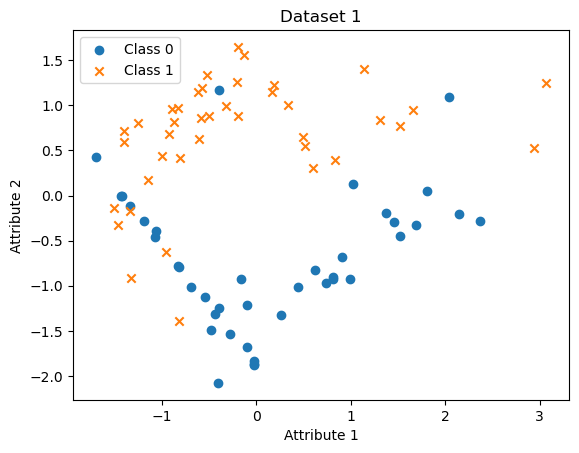

In [2]:

# Set random seed for reproducibility
np.random.seed(42)

# Creating a Dataset 1 for binary classification havin 2 classes
D1X, D1y = make_classification(
    n_samples=80,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    flip_y=0.1,
    class_sep=0.8,
    random_state=42
)

print(D1X.shape)


# Visualize the  Dataset 1

plt.scatter(D1X[D1y == 0, 0], D1X[D1y == 0, 1], label='Class 0', marker='o')
plt.scatter(D1X[D1y == 1, 0], D1X[D1y == 1, 1], label='Class 1', marker='x')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.title('Dataset 1')
plt.show()



(88, 2)


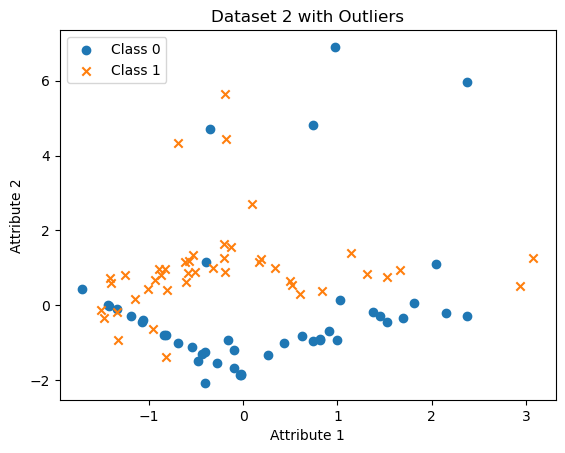

In [3]:
# Adding outliers to Dataset 1 to create Dataset 2
outliers_class_0 = np.random.normal([0, 5], [1.5, 1.25], size=(4, 2))
outliers_class_1 = np.random.normal([0, 5], [0.4, 1.2], size=(4, 2))

D2X = np.vstack([D1X, outliers_class_0, outliers_class_1])
D2y = np.hstack([D1y, np.zeros(4), np.ones(4)])
print(D2X.shape)
plt.scatter(D2X[D2y == 0, 0], D2X[D2y == 0, 1], label='Class 0', marker='o')
plt.scatter(D2X[D2y == 1, 0], D2X[D2y == 1, 1], label='Class 1', marker='x')

plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.legend()
plt.title('Dataset 2 with Outliers')
plt.show()



In [4]:
# Split Dataset 1
X_train_D1, X_test_D1, y_train_D1, y_test_D1 = train_test_split(D1X, D1y, test_size=0.2, random_state=14)
print(f"Dataset 1: Training data: {X_train_D1.shape}, Test data: {X_test_D1.shape}")

# Split Dataset 2
X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(D2X, D2y, test_size=0.2, random_state=14)
print(f"Dataset 2: Training data: {X_train_D2.shape}, Test data: {X_test_D2.shape}")


Dataset 1: Training data: (64, 2), Test data: (16, 2)
Dataset 2: Training data: (70, 2), Test data: (18, 2)


Dataset 1 

In [5]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Classifiers set up
classifiers = {
    'k-NN': KNeighborsClassifier(3),
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(max_depth=5, random_state=14),
    'Random Forests': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=14)
}

# Training and evaluating each classifier in a loop
for clf_name, clf in classifiers.items():
    clf.fit(X_train_D1, y_train_D1)
    train_accuracy_D1 = accuracy_score(y_train_D1, clf.predict(X_train_D1))
    test_accuracy_D1 = accuracy_score(y_test_D1, clf.predict(X_test_D1))
    confusion_matrix_test_D1 = confusion_matrix(y_test_D1, clf.predict(X_test_D1))

    print(f"{clf_name} - Training Accuracy: {train_accuracy_D1}, Testing Accuracy: {test_accuracy_D1}")
    print(f"Confusion Matrix:\n{confusion_matrix_test_D1}")


k-NN - Training Accuracy: 0.90625, Testing Accuracy: 0.875
Confusion Matrix:
[[8 1]
 [1 6]]
Naive Bayes - Training Accuracy: 0.859375, Testing Accuracy: 0.875
Confusion Matrix:
[[7 2]
 [0 7]]
Decision Trees - Training Accuracy: 0.984375, Testing Accuracy: 0.8125
Confusion Matrix:
[[7 2]
 [1 6]]
Random Forests - Training Accuracy: 0.953125, Testing Accuracy: 0.875
Confusion Matrix:
[[8 1]
 [1 6]]


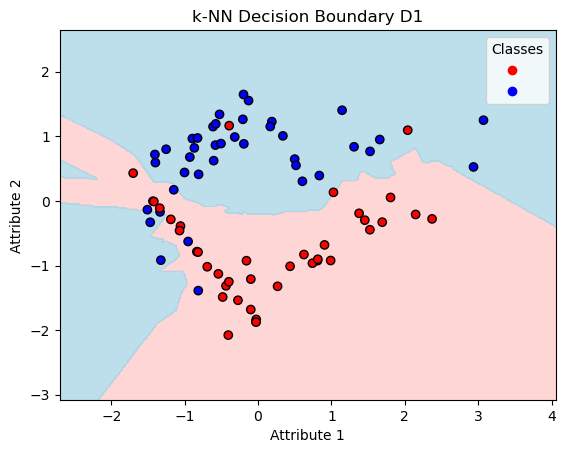

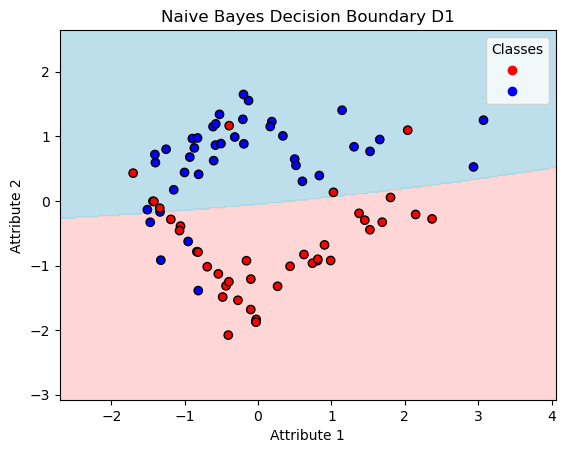

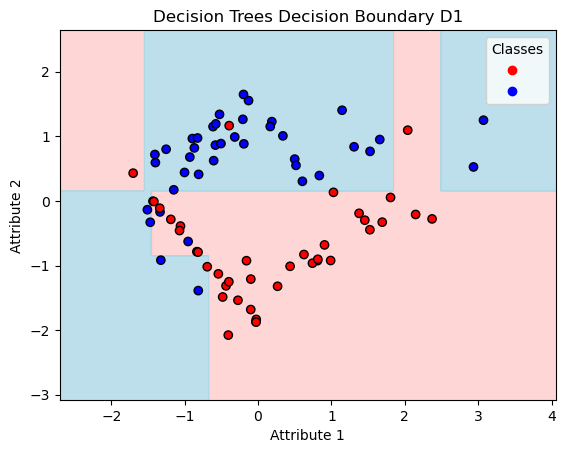

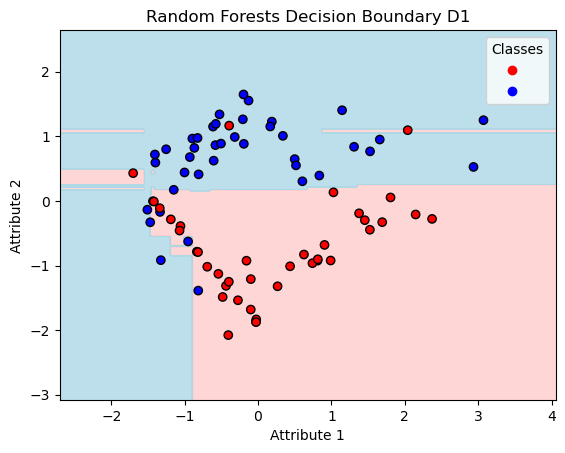

In [6]:
# Import necessary libraries
from matplotlib.colors import ListedColormap

# Define a function to plot decision boundaries
def plot_decision_boundary(D1X, D1y, clf, title):
    x_min, x_max = D1X[:, 0].min() - 1, D1X[:, 0].max() + 1
    y_min, y_max = D1X[:, 1].min() - 1, D1X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFCCCC', '#ADD8E6'])
    cmap_bold = ['#FF0000', '#0000FF']

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    scatter = plt.scatter(D1X[:, 0], D1X[:, 1], c=D1y, cmap=ListedColormap(cmap_bold), edgecolor='k', label=['Class 0', 'Class 1'])

    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], title="Classes")

    plt.xlabel('Attribute 1')
    plt.ylabel('Attribute 2')
    plt.title(title)
    plt.show()

# Plot decision boundary for the entire dataset
for clf_name, clf in classifiers.items():
    plot_decision_boundary(D1X, D1y, clf, title=f'{clf_name} Decision Boundary D1')


Dataset 2

In [7]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Set up classifiers
classifiers = {
    'k-NN': KNeighborsClassifier(3),
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(max_depth=5, random_state=14),
    'Random Forests': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=14)
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_D2, y_train_D2)
    train_accuracy_D2 = accuracy_score(y_train_D2, clf.predict(X_train_D2))
    test_accuracy_D2 = accuracy_score(y_test_D2, clf.predict(X_test_D2))
    confusion_matrix_test_D2 = confusion_matrix(y_test_D2, clf.predict(X_test_D2))

    print(f"{clf_name} - Training Accuracy: {train_accuracy_D2}, Testing Accuracy: {test_accuracy_D2}")
    print(f"Confusion Matrix:\n{confusion_matrix_test_D2}")


k-NN - Training Accuracy: 0.9, Testing Accuracy: 0.7777777777777778
Confusion Matrix:
[[6 0]
 [4 8]]
Naive Bayes - Training Accuracy: 0.7571428571428571, Testing Accuracy: 0.7777777777777778
Confusion Matrix:
[[ 4  2]
 [ 2 10]]
Decision Trees - Training Accuracy: 0.9857142857142858, Testing Accuracy: 0.7777777777777778
Confusion Matrix:
[[6 0]
 [4 8]]
Random Forests - Training Accuracy: 0.9714285714285714, Testing Accuracy: 0.7777777777777778
Confusion Matrix:
[[6 0]
 [4 8]]


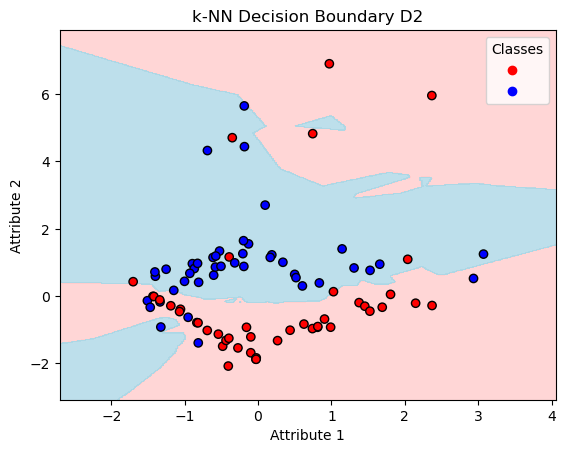

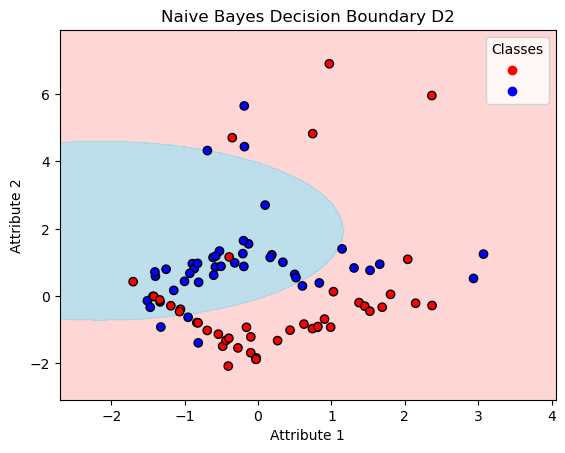

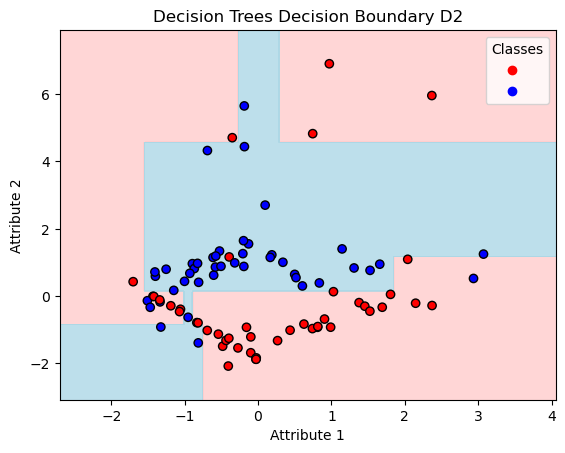

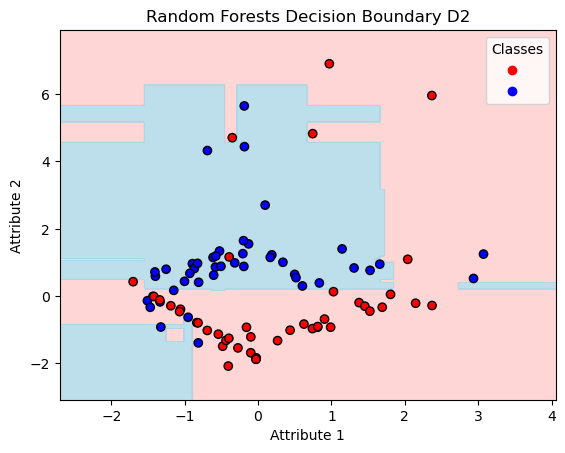

In [8]:
# Import necessary libraries
from matplotlib.colors import ListedColormap

# Define a function to plot decision boundaries
def plot_decision_boundary(D2X, D2y, clf, title):
    x_min, x_max = D2X[:, 0].min() - 1, D2X[:, 0].max() + 1
    y_min, y_max = D2X[:, 1].min() - 1, D2X[:, 1].max() + 1
    xxx, yyy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xxx.ravel(), yyy.ravel()])
    Z = Z.reshape(xxx.shape)

    cmap_light = ListedColormap(['#FFCCCC', '#ADD8E6'])
    cmap_bold = ['#FF0000', '#0000FF']

    plt.figure()
    plt.contourf(xxx, yyy, Z, alpha=0.8, cmap=cmap_light)
    scatter = plt.scatter(D2X[:, 0], D2X[:, 1], c=D2y, cmap=ListedColormap(cmap_bold), edgecolor='k', label=['Class 0', 'Class 1'])

    # Add legend
    plt.legend(handles=scatter.legend_elements()[0], title="Classes")

    plt.xlabel('Attribute 1')
    plt.ylabel('Attribute 2')
    plt.title(title)
    plt.show()

# Plot decision boundary for the entire dataset
for clf_name, clf in classifiers.items():
    plot_decision_boundary(D2X, D2y, clf, title=f'{clf_name} Decision Boundary D2')
